<a href="https://www.kaggle.com/code/rubanzasilva/eda-fast-ai-neural-nets-gradient-boosting?scriptVersionId=254924439" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Binary Classification on a Bank Dataset 

In this competition, we are tasked with predicting whether a client will subscribe to a term deposit.

Per Investopedia, a [bank term deposit](https://www.investopedia.com/terms/t/termdeposit.asp) is a bank savings product where funds are committed to a financial institution for a certain duration. Here, you agree to deposit a specific amount of money for a predetermined period of time in exchange for a guaranteed interest rate.

This interest rate is usually higher than that given on a regular savings account because you are giving up liquidity. The trade-off is simple: you sacrifice immediate access to your money in exchange for higher, guaranteed returns. Banks can offer better rates because they know exactly how long they'll have your funds to lend out to other customers.

## Library & Data Import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [2]:
%%time
%pip install catboost
%pip install optuna
#%pip install optuna_distributed
#%pip install openfe
%pip install seaborn
%pip install xgboost
%pip install lightgbm
%pip install fastkaggle
#%pip install h2o
%pip install -Uqq fastbook
#%pip install polars
%pip install -q -U autogluon.tabular
%pip install autogluon
%pip install --upgrade pip
%pip install tqdm
#%pip install wandb
#%pip install sweetviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The latest version of AutoGluon appears to have a compatibility issue with the latest versions of NumPy, so for now, I will downgrade NumPy to a known working version.

In [3]:
#%pip install -U autogluon > /dev/null
# In your terminal/command prompt
#pip install numpy==1.24.3
# or
%pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 125.6 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
autogluon-core 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-tabular 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-multimodal 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-features 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is

In [4]:
# Update to compatible versions
!pip install autogluon==1.1.1 xgboost==2.0.3
# Restart kernel after installation

  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of google-api-core to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 38.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 77.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 30.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 93.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 30.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 68.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 86.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 74.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm

#import fastbook
#fastbook.setup_book()
#from fastbook import *
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm
from ipywidgets import interact

from fastai.imports import *
np.set_printoptions(linewidth=130)


from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score,train_test_split,GridSearchCV


from pathlib import Path
import os

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier,CatBoostRegressor,Pool, metrics, cv


import warnings


#from openfe import OpenFE, transform
from autogluon.tabular import TabularDataset, TabularPredictor

#import h2o
#from h2o.automl import H2OAutoML

import gc

import optuna
from optuna.samplers import TPESampler

import pickle
from joblib import dump, load
#import sweetviz as sv
#from IPython.display import FileLink

#import h2o
#from h2o.automl import H2OAutoML

In [6]:
path = Path('/kaggle/input/playground-series-s5e8/')
path

Path('/kaggle/input/playground-series-s5e8')

In [7]:
train_df = pd.read_csv(path/'train.csv',index_col='id')
test_df = pd.read_csv(path/'test.csv',index_col='id')
sub_df = pd.read_csv(path/'sample_submission.csv')

In [8]:
train_df.shape

(750000, 17)

## Exploratory Data Analysis

In [9]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 103.0+ MB


In [11]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
missing_values_count = train_df.isnull().sum()
sorted_missing_values = missing_values_count.sort_values(ascending=False)
print(sorted_missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [13]:
#Missing values returned as percentages.
missing_percentages = train_df.isnull().mean() * 100
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)
print(sorted_missing_percentages)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64


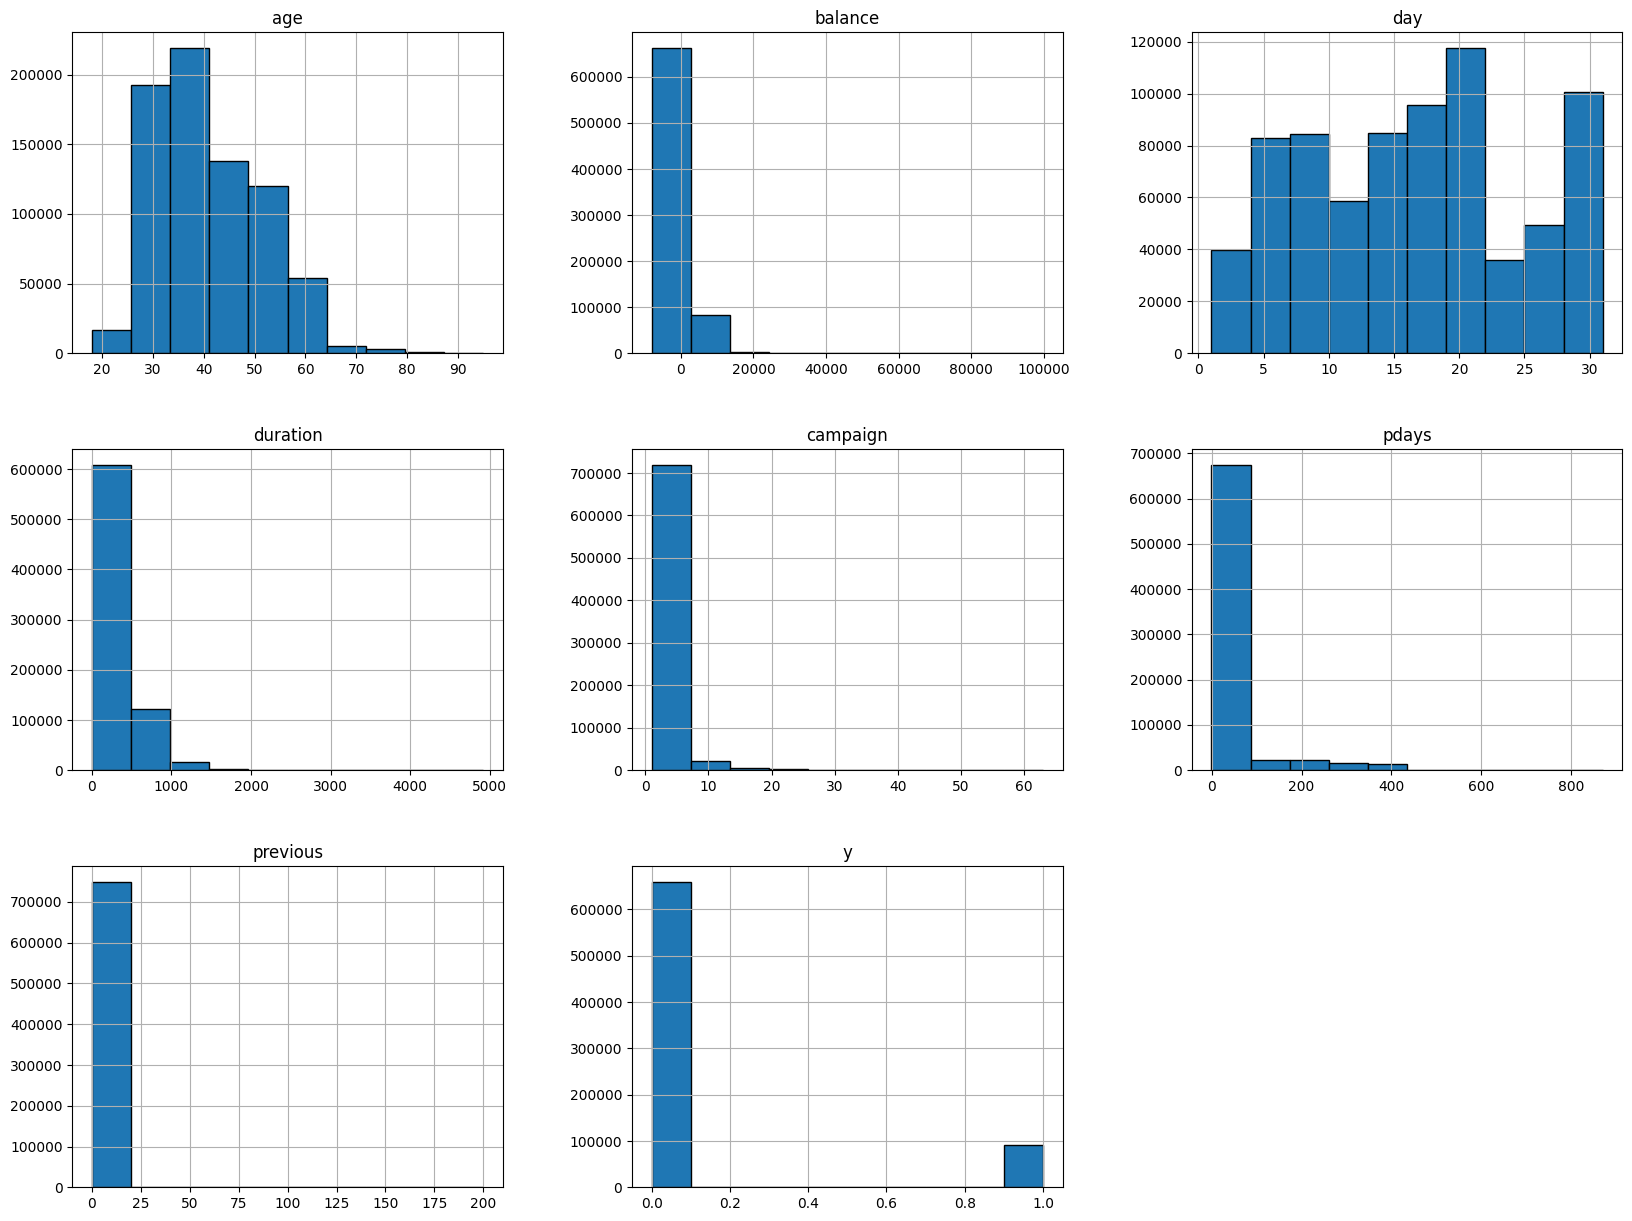

In [14]:
train_df.hist(figsize=(20,15),edgecolor='black');

In [15]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,750000.0,40.926395,10.098829,18.0,33.0,39.0,48.0,95.0
balance,750000.0,1204.067397,2836.096759,-8019.0,0.0,634.0,1390.0,99717.0
day,750000.0,16.117209,8.250832,1.0,9.0,17.0,21.0,31.0
duration,750000.0,256.229144,272.555662,1.0,91.0,133.0,361.0,4918.0
campaign,750000.0,2.577008,2.718514,1.0,1.0,2.0,3.0,63.0
pdays,750000.0,22.412733,77.319998,-1.0,-1.0,-1.0,-1.0,871.0
previous,750000.0,0.298545,1.335926,0.0,0.0,0.0,0.0,200.0
y,750000.0,0.120651,0.325721,0.0,0.0,0.0,0.0,1.0


## Prepare Data for training

In [16]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [17]:
#train_df = pd.concat([train_df, original_df], ignore_index=True)

In [18]:
cont_names,cat_names = cont_cat_split(train_df, dep_var='y')
#splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
#to = TabularPandas(train_df, procs=[Categorify,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='y',
                   y_block=CategoryBlock(),
                   splits=splits)
dls = to.dataloaders(bs=64)
#dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [19]:
cont_names,len(cont_names)

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], 7)

In [20]:
cat_names, len(cat_names)

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome'],
 9)

In [21]:
X_train

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
id,,,,,,,,,,,,,,,,
503688,2,2,2,1,2,2,1,9,4,-0.783691,-0.425704,-0.621349,-0.555179,-0.211671,-0.302935,-0.222162
60097,1,1,2,1,1,1,1,10,4,-0.387476,0.416352,-0.863730,0.878499,-0.579835,-0.302935,-0.222162
50351,2,2,2,1,2,1,1,9,4,-0.090316,-0.089449,-0.621349,-0.177509,0.156492,-0.302935,-0.222162
351404,2,2,1,1,2,1,3,7,4,-0.486530,0.034341,-0.015396,1.083834,0.156492,-0.302935,-0.222162
561250,4,2,2,1,2,1,3,7,4,0.107791,-0.200824,-1.227302,-0.478178,-0.579835,-0.302935,-0.222162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693006,1,3,3,1,1,1,1,11,4,-0.585583,-0.077389,-0.015396,1.538505,0.524656,-0.302935,-0.222162
376733,6,1,2,1,1,1,3,7,4,0.206845,-0.425704,0.348176,-0.573512,0.524656,-0.302935,-0.222162
142597,7,2,3,1,1,2,1,6,4,-0.783691,-0.220688,-0.984921,-0.573512,-0.211671,-0.302935,-0.222162


Below we define a function to help us do stratified kfold cross validation which we use below

In [22]:
def cross_val_predict(model, X_train, y_train, X_test, n_splits=5, random_state=42, 
                       return_proba=True, scoring='roc_auc', verbose=True):
    """
    Generic cross-validation function that works with ANY sklearn-compatible model.
    
    Parameters:
    - model: INSTANTIATED model object (e.g., xgb.XGBClassifier(n_estimators=100))
    - X_train, y_train: training data and labels
    - X_test: test data for final predictions
    - n_splits: number of CV folds
    - random_state: random seed for reproducibility
    - return_proba: if True, return probabilities; if False, return class predictions
    - scoring: metric to use ('roc_auc', 'accuracy')
    - verbose: print progress
    
    Returns:
    - oof_predictions: out-of-fold predictions on training set
    - test_predictions: predictions on test set (averaged across folds)
    - mean_score: mean score across folds
    - fold_scores: list of scores for each fold
    """
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score, roc_auc_score
    from sklearn.base import clone
    import numpy as np
    
    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialize arrays to store results
    if return_proba:
        oof_predictions = np.zeros(len(X_train))
        test_predictions = np.zeros(len(X_test))
    else:
        oof_predictions = np.zeros(len(X_train), dtype=int)
        test_predictions = np.zeros(len(X_test))
    
    fold_scores = []
    
    # Perform cross-validation
    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
        if verbose:
            print(f"Training fold {fold}/{n_splits}...")
        
        # Split data for current fold
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Clone the model to avoid interference between folds
        model_fold = clone(model)
        
        # Train model on current fold
        model_fold.fit(X_fold_train, y_fold_train)
        
        # Get predictions based on return_proba setting
        if return_proba:
            # Get probabilities for positive class
            y_pred_proba = model_fold.predict_proba(X_fold_val)[:, 1]
            oof_predictions[val_index] = y_pred_proba
            test_predictions += model_fold.predict_proba(X_test)[:, 1] / n_splits
            
            # Calculate score
            if scoring == 'roc_auc':
                cv_score = roc_auc_score(y_fold_val, y_pred_proba)
            else:  # accuracy
                y_pred_fold = (y_pred_proba > 0.5).astype(int)
                cv_score = accuracy_score(y_fold_val, y_pred_fold)
        else:
            # Get class predictions
            y_pred_fold = model_fold.predict(X_fold_val)
            oof_predictions[val_index] = y_pred_fold
            test_predictions += model_fold.predict(X_test) / n_splits
            cv_score = accuracy_score(y_fold_val, y_pred_fold)
        
        fold_scores.append(cv_score)
        if verbose:
            print(f"Fold {fold} {scoring}: {cv_score:.6f}")
    
    # Round test predictions if using hard predictions
    if not return_proba:
        test_predictions = np.round(test_predictions).astype(int)
    
    # Calculate mean score
    mean_score = np.mean(fold_scores)
    if verbose:
        print(f"\nMean {scoring}: {mean_score:.6f}")
    
    return oof_predictions, test_predictions, mean_score, fold_scores


# =============================================================================
# USAGE EXAMPLES WITH DIFFERENT MODELS
# =============================================================================

# Example: CatBoost (if installed)
"""
cat_model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_state=42,
    verbose=False
)

cat_oof, cat_test, cat_auc, cat_scores = cross_val_predict(
    model=cat_model,
    X_train=X_train,
    y_train=y_train, 
    X_test=X_test,
    return_proba=True,
    scoring='roc_auc'
)
"""

# =============================================================================
# ENSEMBLE ALL MODELS
# =============================================================================
"""
print("Individual Model Performance:")
print(f"XGBoost AUC: {xgb_auc:.6f}")
print(f"Random Forest AUC: {rf_auc:.6f}")
print(f"LightGBM AUC: {lgb_auc:.6f}")

# Simple ensemble
ensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3
ensemble_test = (xgb_test + rf_test + lgb_test) / 3

ensemble_auc = roc_auc_score(y_train, ensemble_oof)
print(f"\nEnsemble AUC: {ensemble_auc:.6f}")

# Create submission
submission = pd.DataFrame({
    'id': test_df.index,
    'Depression': ensemble_test
})
submission.to_csv('ensemble_submission.csv', index=False)

print(f"\nShapes:")
print(f"OOF predictions: {ensemble_oof.shape} (training data)")
print(f"Test predictions: {ensemble_test.shape} (test data)")
print("Different shapes = different datasets!")
"""

'\nprint("Individual Model Performance:")\nprint(f"XGBoost AUC: {xgb_auc:.6f}")\nprint(f"Random Forest AUC: {rf_auc:.6f}")\nprint(f"LightGBM AUC: {lgb_auc:.6f}")\n\n# Simple ensemble\nensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3\nensemble_test = (xgb_test + rf_test + lgb_test) / 3\n\nensemble_auc = roc_auc_score(y_train, ensemble_oof)\nprint(f"\nEnsemble AUC: {ensemble_auc:.6f}")\n\n# Create submission\nsubmission = pd.DataFrame({\n    \'id\': test_df.index,\n    \'Depression\': ensemble_test\n})\nsubmission.to_csv(\'ensemble_submission.csv\', index=False)\n\nprint(f"\nShapes:")\nprint(f"OOF predictions: {ensemble_oof.shape} (training data)")\nprint(f"Test predictions: {ensemble_test.shape} (test data)")\nprint("Different shapes = different datasets!")\n'

## Neural Networks

In [23]:
learn = tabular_learner(dls, metrics=RocAucBinary())

SuggestedLRs(slide=0.02754228748381138, valley=0.001737800776027143)

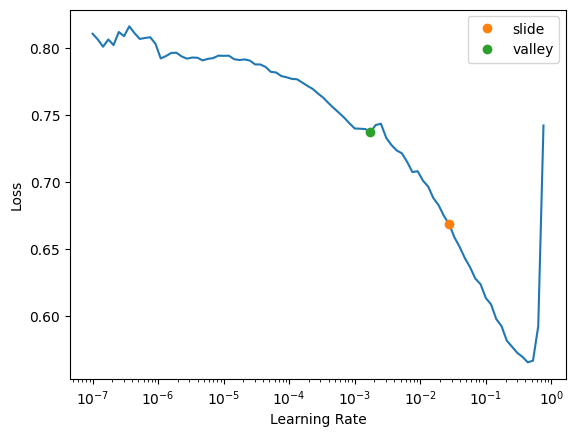

In [24]:
#learn.lr_find()
learn.lr_find(suggest_funcs=(slide,valley))

In [25]:
%%time
learn.fit_one_cycle(2, 1.089e-3)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.162967,0.166241,0.955991,01:30
1,0.163399,0.159589,0.959836,01:29


CPU times: user 2min 58s, sys: 1.49 s, total: 3min
Wall time: 3min


In [26]:
dl = test_dl

In [27]:
learn.save('nn_pnality_tp_pd')

Path('models/nn_pnality_tp_pd.pth')

In [28]:
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba = (a_preds[:, 1])

In [29]:
a_preds.shape

torch.Size([250000, 2])

In [30]:
nn_preds_y.shape,sub_df.shape

(torch.Size([250000, 2]), (250000, 2))

In [31]:
nn_preds_x

tensor([[9.9983e-01, 1.6646e-04],
        [4.3690e-01, 5.6310e-01],
        [9.9818e-01, 1.8191e-03],
        ...,
        [9.9966e-01, 3.3938e-04],
        [9.4366e-01, 5.6337e-02],
        [9.9657e-01, 3.4336e-03]])

In [32]:
nn_preds_y

tensor([[9.9706e-01, 2.9364e-03],
        [7.3787e-01, 2.6213e-01],
        [9.9987e-01, 1.2644e-04],
        ...,
        [3.1569e-01, 6.8431e-01],
        [9.9765e-01, 2.3483e-03],
        [8.5506e-01, 1.4494e-01]])

In [33]:
a_preds

tensor([[9.9706e-01, 2.9364e-03],
        [7.3787e-01, 2.6213e-01],
        [9.9987e-01, 1.2644e-04],
        ...,
        [3.1569e-01, 6.8431e-01],
        [9.9765e-01, 2.3483e-03],
        [8.5506e-01, 1.4494e-01]])

In [34]:
nn_preds_proba

tensor([2.9364e-03, 2.6213e-01, 1.2644e-04,  ..., 6.8431e-01, 2.3483e-03,
        1.4494e-01])

In [35]:
#final_preds = torch.round(a_preds).long()
final_preds = a_preds[:,1]
final_preds

tensor([2.9364e-03, 2.6213e-01, 1.2644e-04,  ..., 6.8431e-01, 2.3483e-03,
        1.4494e-01])

In [36]:
final_preds.shape

torch.Size([250000])

In [37]:
!rm submission.csv
sub_df['y'] = final_preds
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

rm: cannot remove 'submission.csv': No such file or directory


,y
id,
750000,0.002936
750001,0.262132
750002,0.000126
750003,0.000189
750004,0.013418
...,...
999995,0.000098
999996,0.091258
999997,0.684309


## Decision Trees

### Random Forests

In [38]:
%%time
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

CPU times: user 2min 18s, sys: 290 ms, total: 2min 18s
Wall time: 2min 18s


0.9636473221753568

In [39]:
rf_preds_probs,rf_preds_probs.shape

(tensor([1.8876e-02, 2.3299e-01, 3.3333e-03,  ..., 7.0616e-01, 1.7527e-04,
         1.1081e-01]),
 torch.Size([250000]))

In [40]:
rf_preds_probs 

tensor([1.8876e-02, 2.3299e-01, 3.3333e-03,  ..., 7.0616e-01, 1.7527e-04,
        1.1081e-01])

In [41]:
def rf_feat_importance(m, train_subset):
    return pd.DataFrame({'cols':train_subset.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [42]:
fi = rf_feat_importance(rf_model, X_train)
#fi[:10]

fi

,cols,imp
12,duration,0.468270
10,balance,0.093874
7,month,0.068542
9,age,0.066543
11,day,0.056128
8,poutcome,0.041207
14,pdays,0.037542
4,housing,0.037279
6,contact,0.031420
0,job,0.026808


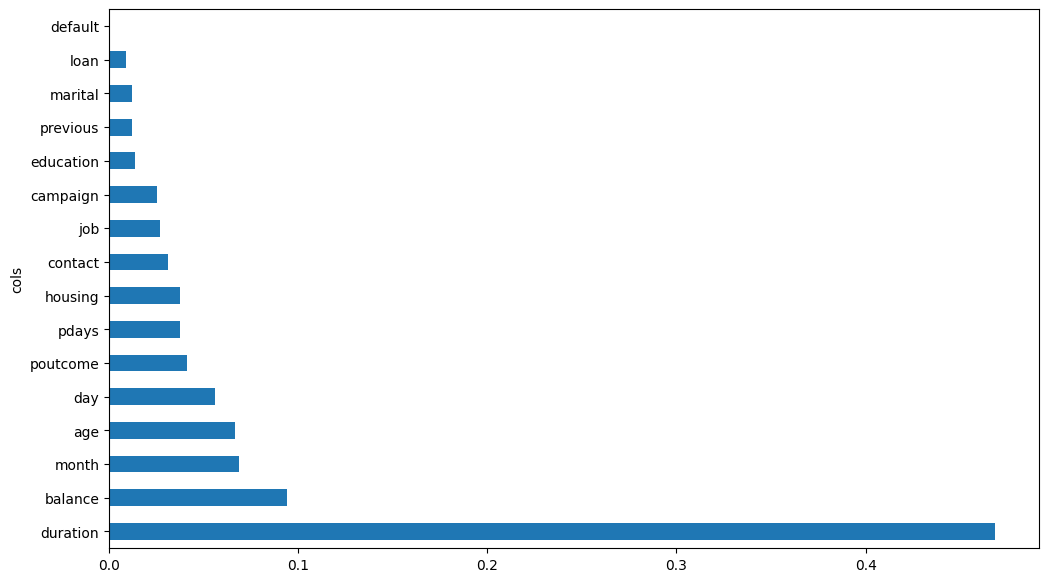

In [43]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

#plot_fi(fi[:30]);
plot_fi(fi);

#### Cross validation - RF

In [44]:
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf

RandomForestClassifier(min_samples_leaf=3)

In [45]:
rf_oof_predictions, rf_test_predictions, rf_mean_score, rf_fold_scores = cross_val_predict(
    model=rf, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.963413
Training fold 2/5...
Fold 2 roc_auc: 0.963544
Training fold 3/5...
Fold 3 roc_auc: 0.963832
Training fold 4/5...
Fold 4 roc_auc: 0.963442
Training fold 5/5...
Fold 5 roc_auc: 0.963040

Mean roc_auc: 0.963454


In [46]:
rf_oof_predictions.shape, rf_test_predictions.shape

((600000,), (150000,))

In [47]:
rf_oof_predictions

array([4.19463087e-06, 5.18529044e-01, 1.07938402e-02, ..., 1.14488210e-02, 5.15065671e-06, 6.55737705e-04])

In [48]:
rf_test_predictions

array([0.00556011, 0.5923953 , 0.00260592, ..., 0.02115125, 0.0606339 , 0.00073104])

In [49]:
rf_mean_score, rf_fold_scores

(0.9634543071291276,
 [0.9634132887976656,
  0.9635442880878831,
  0.963832311014618,
  0.9634418903610162,
  0.963039757384455])

In [50]:
!rm submission.csv
sub_df['y'] = rf_preds_probs
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.018876
750001,0.232989
750002,0.003333
750003,0.000000
750004,0.031393
...,...
999995,0.000000
999996,0.151700
999997,0.706157


## Gradient Boosting

### XGBoost

In [51]:
%%time
xgb_model = xgb.XGBClassifier()
xgb_model = xgb_model.fit(X_train, y_train)

xgb_preds = tensor(xgb_model.predict(test_dl.xs))
xgb_preds_proba = tensor(xgb_model.predict_proba(test_dl.xs))[:, 1]

xgb_preds_x = tensor(xgb_model.predict(X_test))
xgb_preds_x_proba = tensor(xgb_model.predict_proba(X_test))[:, 1]

xgb_score = roc_auc_score(y_test,xgb_preds_x_proba)
xgb_score

CPU times: user 8.9 s, sys: 57.9 ms, total: 8.96 s
Wall time: 4.59 s


0.9659828710370115

In [52]:
xgb_preds_proba

tensor([1.5998e-03, 6.0663e-02, 1.2773e-04,  ..., 8.2571e-01, 6.6193e-04,
        2.1537e-01])

#### XGB Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

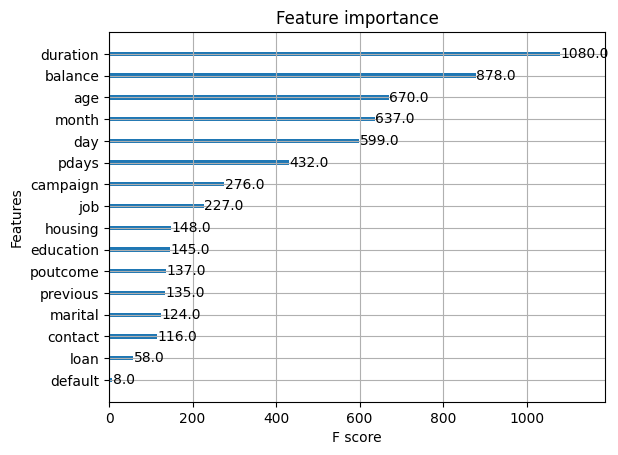

In [53]:
#plot_importance(xgb_model.fit(X_train, y_train))
plot_importance(xgb_model)

#### Cross Validation - XGBoost

In [54]:
xgb_model = xgb.XGBClassifier()
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
xgb_oof_predictions, xgb_test_predictions, xgb_mean_score, xgb_fold_scores = cross_val_predict(
    model=xgb_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.966026
Training fold 2/5...
Fold 2 roc_auc: 0.965689
Training fold 3/5...
Fold 3 roc_auc: 0.966316
Training fold 4/5...
Fold 4 roc_auc: 0.965869
Training fold 5/5...
Fold 5 roc_auc: 0.965547

Mean roc_auc: 0.965889


In [56]:
xgb_oof_predictions

array([4.59315750e-04, 6.32481158e-01, 1.50578478e-02, ..., 7.02433288e-03, 9.50930043e-05, 1.68489933e-04])

In [57]:
xgb_test_predictions

array([3.88712240e-03, 5.67311630e-01, 7.38692026e-04, ..., 6.59620937e-05, 3.89577539e-02, 2.88291762e-03])

In [58]:
xgb_mean_score

0.9658894909469591

In [59]:
 xgb_fold_scores

[0.9660260551319733,
 0.965689241571712,
 0.9663162481407107,
 0.96586925072202,
 0.9655466591683799]

In [60]:
!rm submission.csv
sub_df['y'] = xgb_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.001600
750001,0.060663
750002,0.000128
750003,0.000295
750004,0.019918
...,...
999995,0.000156
999996,0.092839
999997,0.825711


### LGBM

In [61]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier()
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds_prob = tensor(lgbm_model.predict_proba(test_dl.xs))
lgbm_preds_proba = (lgbm_preds_prob[:, 1])

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))
lgbm_preds_x_prob = tensor(lgbm_model.predict_proba(X_test))
lgbm_positive_preds_x = (lgbm_preds_x_prob[:, 1])

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

[LightGBM] [Info] Number of positive: 72661, number of negative: 527339
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1006
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121102 -> initscore=-1.982039
[LightGBM] [Info] Start training from score -1.982039
CPU times: user 12.5 s, sys: 73.9 ms, total: 12.5 s
Wall time: 6.42 s


0.9649411524123004

In [62]:
lgbm_preds_prob,lgbm_preds_prob.shape

(tensor([[0.9961, 0.0039],
         [0.8863, 0.1137],
         [0.9987, 0.0013],
         ...,
         [0.3121, 0.6879],
         [0.9988, 0.0012],
         [0.8719, 0.1281]]),
 torch.Size([250000, 2]))

#### LGBM Feature Importance

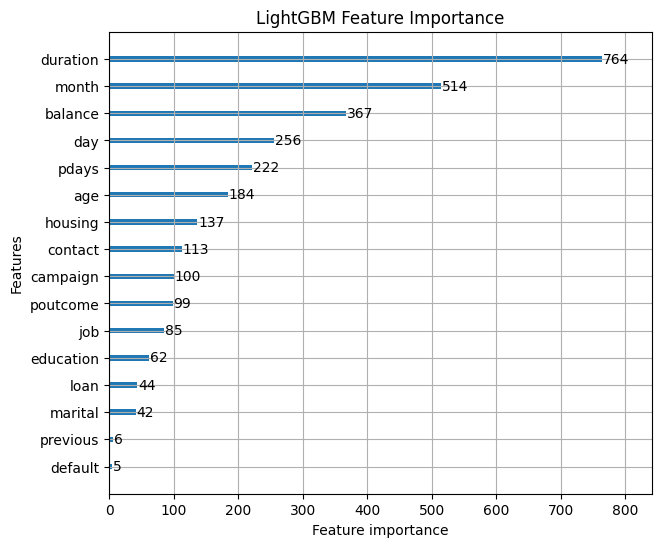

In [63]:
# Plot feature importance without using Gain or split
lgb.plot_importance(lgbm_model, figsize=(7,6), title="LightGBM Feature Importance")
#plt.title('LGBM Feature Importance')
#plt.tight_layout()
plt.show()

#### Cross Validation - LGBM

In [64]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model

LGBMClassifier()

In [65]:
lgbm_oof_predictions, lgbm_test_predictions, lgbm_mean_score, lgbm_fold_scores = cross_val_predict(
    model=lgbm_model, X_train=X_train, y_train=y_train, X_test=X_test,
)

Training fold 1/5...
[LightGBM] [Info] Number of positive: 58129, number of negative: 421871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1007
[LightGBM] [Info] Number of data points in the train set: 480000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121102 -> initscore=-1.982035
[LightGBM] [Info] Start training from score -1.982035
Fold 1 roc_auc: 0.964991
Training fold 2/5...
[LightGBM] [Info] Number of positive: 58129, number of negative: 421871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points i

In [66]:
lgbm_oof_predictions

array([1.16459158e-03, 6.38536792e-01, 1.89344028e-02, ..., 1.16299066e-02, 7.38458484e-04, 5.23397070e-04])

In [67]:
lgbm_test_predictions

array([1.52519598e-03, 6.69395731e-01, 2.12760262e-03, ..., 4.41785840e-04, 1.86302005e-02, 7.31634443e-03])

In [68]:
 lgbm_mean_score

0.9648431167884135

In [69]:
lgbm_fold_scores

[0.9649905903260891,
 0.9649503201678697,
 0.965123441950283,
 0.9646746169910965,
 0.9644766145067294]

In [70]:
!rm submission.csv
sub_df['y'] = lgbm_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.003909
750001,0.113665
750002,0.001341
750003,0.000537
750004,0.034997
...,...
999995,0.000315
999996,0.116824
999997,0.687855


### CatBoost

In [71]:
%%time
#using full ds
cat_model = CatBoostClassifier()
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

CPU times: user 3min 59s, sys: 10.4 s, total: 4min 9s
Wall time: 1min 4s


0.9673153648599846

#### CatBoost Feature Importance

In [72]:
feature_importance_default = cat_model.get_feature_importance()
feature_names = X_train.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance_default
}).sort_values('importance', ascending=False)

print("=== Default Feature Importance (PredictionValuesChange) ===")
print(importance_df.head(10))

=== Default Feature Importance (PredictionValuesChange) ===
     feature  importance
12  duration   47.335689
6    contact    9.699220
7      month    9.373629
10   balance    8.239152
4    housing    5.646264
11       day    3.966360
9        age    2.686650
14     pdays    2.635281
13  campaign    2.585703
8   poutcome    2.082050


#### Cross validation - CatBoost

In [73]:
cat_model = CatBoostClassifier()
cat_model

In [74]:
cat_oof_predictions, cat_test_predictions, cat_mean_score, cat_fold_scores = cross_val_predict(
    model=cat_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Learning rate set to 0.143822
0:	learn: 0.4847836	total: 52.5ms	remaining: 52.5s
1:	learn: 0.3670873	total: 102ms	remaining: 51s
2:	learn: 0.2979152	total: 149ms	remaining: 49.7s
3:	learn: 0.2598682	total: 199ms	remaining: 49.6s
4:	learn: 0.2379703	total: 247ms	remaining: 49.2s
5:	learn: 0.2245639	total: 294ms	remaining: 48.6s
6:	learn: 0.2147479	total: 342ms	remaining: 48.5s
7:	learn: 0.2083034	total: 392ms	remaining: 48.7s
8:	learn: 0.2027253	total: 443ms	remaining: 48.7s
9:	learn: 0.1985854	total: 494ms	remaining: 48.9s
10:	learn: 0.1954472	total: 544ms	remaining: 48.9s
11:	learn: 0.1934018	total: 593ms	remaining: 48.8s
12:	learn: 0.1910310	total: 640ms	remaining: 48.6s
13:	learn: 0.1890599	total: 689ms	remaining: 48.6s
14:	learn: 0.1875787	total: 740ms	remaining: 48.6s
15:	learn: 0.1854334	total: 791ms	remaining: 48.6s
16:	learn: 0.1839412	total: 841ms	remaining: 48.7s
17:	learn: 0.1829699	total: 890ms	remaining: 48.6s
18:	learn: 0.1821089	total: 940ms	remainin

## Ensembling

### Averaging

#### CatBoost + XGBoost

In [75]:
cat_xgb_preds = (xgb_preds_proba + cat_preds_probs)/ 2
cat_xgb_preds 

tensor([2.1417e-03, 8.5552e-02, 2.1042e-04,  ..., 7.3619e-01, 8.3094e-04,
        1.8768e-01])

In [76]:
cat_xgb_x_preds = (xgb_preds_x_proba + cat_preds_x_proba)/ 2
cat_xgb_x_preds 

tensor([1.2791e-03, 5.5930e-01, 8.5966e-04,  ..., 1.1127e-04, 3.5120e-02,
        2.6071e-03])

In [77]:
cat_xgb_score = roc_auc_score(y_test,cat_xgb_x_preds)
cat_xgb_score

0.9673515628737039

#### CatBoost + LGBM

In [78]:
cat_lgbm_preds = (lgbm_preds_proba + cat_preds_probs)/ 2
cat_lgbm_preds 

tensor([0.0033, 0.1121, 0.0008,  ..., 0.6673, 0.0011, 0.1440])

In [79]:
cat_lgbm_x_preds = (lgbm_positive_preds_x + cat_preds_x_proba)/ 2
cat_lgbm_x_preds.shape

torch.Size([150000])

In [80]:
cat_lgbm_score = roc_auc_score(y_test,cat_lgbm_x_preds)
cat_lgbm_score

0.9670731537333109

#### XGBoost + LGBM

In [81]:
lgbm_xgb_preds = (lgbm_preds_proba +  xgb_preds_proba)/ 2
lgbm_xgb_preds 

tensor([2.7542e-03, 8.7164e-02, 7.3452e-04,  ..., 7.5678e-01, 9.4878e-04,
        1.7174e-01])

In [82]:
lgbm_xgb_preds_x = (lgbm_positive_preds_x + xgb_preds_x_proba)/ 2
lgbm_xgb_score = roc_auc_score(y_test,lgbm_xgb_preds_x)
lgbm_xgb_score

0.9662954943168206

In [83]:
!rm submission.csv
sub_df['y'] = lgbm_xgb_preds 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.002754
750001,0.087164
750002,0.000735
750003,0.000416
750004,0.027458
...,...
999995,0.000235
999996,0.104832
999997,0.756783


#### CatBoost + LGBM + XGBoost

In [84]:
cat_lgbm_xgb_preds = (lgbm_preds_proba + cat_preds_probs + xgb_preds_proba)/ 3
cat_lgbm_xgb_preds 

tensor([2.7307e-03, 9.4923e-02, 5.8738e-04,  ..., 7.2008e-01, 9.6584e-04,
        1.6782e-01])

In [85]:
cat_lgbm_xgb_preds_x = (lgbm_positive_preds_x + cat_preds_x_proba + xgb_preds_x_proba)/ 3
cat_lgbm_xgb_score = roc_auc_score(y_test,cat_lgbm_xgb_preds_x)
cat_lgbm_xgb_score

0.9671861838523709

## AutoML

### AutoGluon

In [86]:
target = 'y'
eval_metric = 'roc_auc'
#train_data = train
train_data = train_df
Time_limit = 3600*8
#Time_limit = 300
problem_type='binary'

In [87]:
%%time
predictor = TabularPredictor(label=target, eval_metric=eval_metric, verbosity=1).fit(
    train_data, presets='best_quality', time_limit=Time_limit,
    ag_args_fit={'num_gpus': 1}
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
)

results = predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20250808_082728"
2025-08-08 08:27:28,362	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.8.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-08-08 08:27:31,497	INFO worker.py:1743 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
(_ray_fit pid=683) 	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=683) 1 warning generated.
(_ray_fit pid=683) 1 warning generated.
(_ray_fit pid=683) 1 warning generated.
(_ray_fit pid=683) 1 warning generated.
(_ray_fit pid=683) 1 warning generated.
(_ray_fit pid=683) 1 warning generated.
(_ray_fit pid=683) 1 warning generated.
(_ray_fit pid=683) 1 warning generated.
(_ray_fit pid=683) 1 warning generated.
(_ray_fit pid=683) 1 warning generated.
(_ray_fit pid=683) 1 warning generated.
(_ray_fit pid=683) 1 warning gener

(autoscaler +1h20m36s) Tip: use `ray status` to view detailed cluster status. To disable these messages, set RAY_SCHEDULER_EVENTS=0.
(autoscaler +1h20m36s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=2919) 	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=2919) 	Ran out of time, early stopping on iteration 1. Best iteration is:
(_ray_fit pid=2919) 	[1]	valid_set's binary_logloss: 0.354359
(_ray_fit pid=2953) 	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.


(autoscaler +1h21m26s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=3072) 	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=2953) 	Ran out of time, early stopping on iteration 1. Best iteration is:
(_ray_fit pid=2953) 	[1]	valid_set's binary_logloss: 0.354212


(autoscaler +1h22m1s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=3106) 	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.


(autoscaler +1h22m36s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +1h23m11s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=3140) 	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.


(autoscaler +1h23m46s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=3174) 	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.


(autoscaler +1h24m21s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=3208) 	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.


(autoscaler +1h24m56s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=3242) 	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.


(autoscaler +1h25m31s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +1h26m6s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=3276) 	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.


(autoscaler +1h26m41s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=3310) 	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=3428) 	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.


(autoscaler +1h27m21s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=3462) 	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=3496) 	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.


(autoscaler +1h27m56s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=3530) 	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=3564) 	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.


(autoscaler +1h28m31s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=3598) 	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=3632) 	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.


(autoscaler +1h29m6s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=3666) 	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=3826) 	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=3826) 	Warning: CatBoost on GPU is experimental. If you encounter issues, use CPU for training CatBoost instead.


(autoscaler +1h40m2s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=3871) 	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=3871) 	Warning: CatBoost on GPU is experimental. If you encounter issues, use CPU for training CatBoost instead.
(_ray_fit pid=3915) 	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=3915) 	Warning: CatBoost on GPU is experimental. If you encounter issues, use CPU for training CatBoost instead.
(_ray_fit pid=3959) 	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=3959) 	Warning: CatBoost on GPU is experimental. If you encounter issues, use CPU for training CatBoost instead.


(autoscaler +1h40m37s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=4003) 	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=4003) 	Warning: CatBoost on GPU is experimental. If you encounter issues, use CPU for training CatBoost instead.
(_ray_fit pid=4047) 	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=4047) 	Warning: CatBoost on GPU is experimental. If you encounter issues, use CPU for training CatBoost instead.
(_ray_fit pid=4092) 	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=4092) 	Warning: CatBoost on GPU is experimental. If you encounter issues, use CPU for training CatBoost instead.
(_ray_fit pid=4136) 	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=4136) 	Warning: CatBoost on GPU is experimental. If you encounter issues, use CPU for training CatBoost instead.


(autoscaler +1h45m2s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +1h45m37s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +1h46m12s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +1h46m47s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer ac

(_ray_fit pid=4384) 	Ran out of time, stopping training early. (Stopping on epoch 6)


(autoscaler +1h49m7s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +1h49m42s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=4423) 	Ran out of time, stopping training early. (Stopping on epoch 6)


(autoscaler +1h50m17s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +1h50m52s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +1h51m27s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +1h52m2s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer ac

(_ray_fit pid=4540) 	Ran out of time, stopping training early. (Stopping on epoch 6)


(autoscaler +1h55m43s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=4702) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [10:23:16] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
(_ray_fit pid=4702)   warnings.warn(smsg, UserWarning)
(_ray_fit pid=4702) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [10:23:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.
(_ray_fit pid=4702) 
(_ray_fit pid=4702)     E.g. tree_method = "hist", device = "cuda"
(_ray_fit pid=4702) 
(_ray_fit pid=4702)   warnings.warn(smsg, UserWarning)
(_ray_fit pid=4702) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [10:23:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

(autoscaler +1h56m18s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=4792) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [10:23:51] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
(_ray_fit pid=4792)   warnings.warn(smsg, UserWarning) [repeated 4x across cluster]
(_ray_fit pid=4792)  [repeated 6x across cluster]
(_ray_fit pid=4792) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [10:23:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.
(_ray_fit pid=4792)     E.g. tree_method = "hist", device = "cuda"
(_ray_fit pid=4792) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [10:23:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.
(_ray_fit pid=479

(autoscaler +1h56m53s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=4882) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [10:24:26] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
(_ray_fit pid=4882)   warnings.warn(smsg, UserWarning) [repeated 4x across cluster]
(_ray_fit pid=4882)  [repeated 6x across cluster]
(_ray_fit pid=4882) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [10:24:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.
(_ray_fit pid=4882)     E.g. tree_method = "hist", device = "cuda"
(_ray_fit pid=4882) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [10:24:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.
(_ray_fit pid=488

(autoscaler +1h57m28s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=5026) 	Ran out of time, stopping training early. (Stopping on epoch 1)
(_ray_fit pid=4912)   warnings.warn(smsg, UserWarning) [repeated 2x across cluster]
(_ray_fit pid=4912)  [repeated 4x across cluster]
(_ray_fit pid=5060) 	Ran out of time, stopping training early. (Stopping on epoch 1)


(autoscaler +1h58m3s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=5094) 	Ran out of time, stopping training early. (Stopping on epoch 1)
(_ray_fit pid=5128) 	Ran out of time, stopping training early. (Stopping on epoch 1)


(autoscaler +1h58m38s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=5162) 	Ran out of time, stopping training early. (Stopping on epoch 1)


(autoscaler +1h59m13s) Warning: The following resource request cannot be scheduled right now: {'GPU': 1.0, 'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=5196) 	Ran out of time, stopping training early. (Stopping on epoch 1)
(_ray_fit pid=5230) 	Ran out of time, stopping training early. (Stopping on epoch 1)
(_ray_fit pid=5264) 	Ran out of time, stopping training early. (Stopping on epoch 1)
(_dystack pid=413) /usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
(_dystack pid=413) If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
(_dystack pid=413)   warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
(_dystack pid=413) /usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pic

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val eval_metric  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3   0.970547     roc_auc     995.929666  19797.543710                0.126630          91.926066            3       True         30
1            XGBoost_BAG_L2   0.970356     roc_auc     918.922367  14076.514014                2.773480         107.306107            2       True         25
2      LightGBMLarge_BAG_L2   0.970247     roc_auc     923.226042  14195.669828                7.077154         226.461921            2       True         27
3           LightGBM_BAG_L2   0.970209     roc_auc     920.354794  14119.261656                4.205906         150.053749            2       True         18
4         LightGBMXT_BAG_L2   0.970176     roc_auc     943.586502  14347.978919               27.437615         378.771012            2       True  

In [88]:
%%time
#predictor = TabularPredictor(label=target, eval_metric=eval_metric,verbosity=1,problem_type=problem_type).fit(
    #train_data, presets='best_quality',excluded_model_types=['KNN'], time_limit=Time_limit,
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
#)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [89]:
%%time
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val eval_metric  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3   0.970547     roc_auc     995.929666  19797.543710                0.126630          91.926066            3       True         30
1            XGBoost_BAG_L2   0.970356     roc_auc     918.922367  14076.514014                2.773480         107.306107            2       True         25
2      LightGBMLarge_BAG_L2   0.970247     roc_auc     923.226042  14195.669828                7.077154         226.461921            2       True         27
3           LightGBM_BAG_L2   0.970209     roc_auc     920.354794  14119.261656                4.205906         150.053749            2       True         18
4         LightGBMXT_BAG_L2   0.970176     roc_auc     943.586502  14347.978919               27.437615         378.771012            2       True  

In [90]:
%%time
predictor.leaderboard()

CPU times: user 6.03 ms, sys: 984 µs, total: 7.02 ms
Wall time: 6.67 ms


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.970547,roc_auc,995.929666,19797.543710,0.126630,91.926066,3,True,30
1,XGBoost_BAG_L2,0.970356,roc_auc,918.922367,14076.514014,2.773480,107.306107,2,True,25
2,LightGBMLarge_BAG_L2,0.970247,roc_auc,923.226042,14195.669828,7.077154,226.461921,2,True,27
3,LightGBM_BAG_L2,0.970209,roc_auc,920.354794,14119.261656,4.205906,150.053749,2,True,18
4,LightGBMXT_BAG_L2,0.970176,roc_auc,943.586502,14347.978919,27.437615,378.771012,2,True,17
5,NeuralNetFastAI_BAG_L2,0.970149,roc_auc,921.823908,17025.126600,5.675021,3055.918693,2,True,24
6,CatBoost_BAG_L2,0.970037,roc_auc,916.721181,14185.753408,0.572294,216.545501,2,True,21
7,NeuralNetTorch_BAG_L2,0.969902,roc_auc,923.094250,15570.140542,6.945363,1600.932635,2,True,26
8,RandomForestEntr_BAG_L2,0.969837,roc_auc,947.926733,14413.338093,31.777846,444.130186,2,True,20
9,ExtraTreesEntr_BAG_L2,0.969767,roc_auc,944.482809,14089.638412,28.333922,120.430506,2,True,23


In [91]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df)
autogluon_preds_proba.head(5)  

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

CPU times: user 37min 31s, sys: 10.4 s, total: 37min 41s
Wall time: 18min 55s


,0,1
id,,
750000,0.999041,0.000959
750001,0.927670,0.072330
750002,0.999801,0.000199
750003,0.999820,0.000180
750004,0.990583,0.009417


In [92]:
predictions = autogluon_preds_proba

In [93]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df, as_multiclass=False)
autogluon_preds_proba.head(5)  

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

CPU times: user 37min 22s, sys: 9.2 s, total: 37min 31s
Wall time: 18min 48s


id
750000    0.000959
750001    0.072330
750002    0.000199
750003    0.000180
750004    0.009417
Name: y, dtype: float32

In [94]:
autogluon_preds_proba.shape, cat_lgbm_xgb_preds.shape

((250000,), torch.Size([250000]))

In [95]:
autogluon_preds_proba.values

array([9.5861469e-04, 7.2329529e-02, 1.9894446e-04, ..., 7.0170540e-01, 2.9400690e-04, 1.8242571e-01], dtype=float32)

In [96]:
!rm submission.csv
sub_df['y'] = autogluon_preds_proba.values
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.000959
750001,0.072330
750002,0.000199
750003,0.000180
750004,0.009417
...,...
999995,0.000120
999996,0.083295
999997,0.701705


In [97]:
#!rm submission.csv
#submission = pd.read_csv(path/'sample_submission.csv')
#submission['y'] = autogluon_preds_proba
#submission.head()
#submission.to_csv(path/'sample_submission.csv', index=False)

In [98]:
#!rm submission.csv
#submit = pd.read_csv(path/'sample_submission.csv')
#predictions = predictions.reset_index(drop=False)
#submit = pd.DataFrame({'id': predictions['id'], 'Personality': predictions['Personality']})
#submit.set_index('id', inplace=True)
#submit.to_csv('submission.csv', index=True)
#sub = pd.read_csv('submission.csv', index_col='id')
#sub

### Ranking

In [99]:
auc_roc_score = pd.DataFrame({
    'algorithm': ['Random Forest','XGBoost','LGBM','CatBoost',
                  'CatBoost_XGB_average','CatBoost_LGBM_average',
                  'XGB_LGBM_average','CatBoost_XGB_LGBM_average',
                  
                 ],
    'auc_roc_score': [rf_score,xgb_score,lgbm_score,cat_score,
                      cat_xgb_score,cat_lgbm_score,lgbm_xgb_score,
                      cat_lgbm_xgb_score,
                 
           ]
})

auc_roc_sorted = auc_roc_score.sort_values(by='auc_roc_score', ascending=False)
auc_roc_sorted

,algorithm,auc_roc_score
4,CatBoost_XGB_average,0.967352
3,CatBoost,0.967315
7,CatBoost_XGB_LGBM_average,0.967186
5,CatBoost_LGBM_average,0.967073
6,XGB_LGBM_average,0.966295
1,XGBoost,0.965983
2,LGBM,0.964941
0,Random Forest,0.963647
